# 18기 Clustering 정규세션 과제

## Clustering 해보기
### 1. Preprocssing / EDA
지금까지 배운 내용을 토대로 해당 데이터에 대해 자유롭게 전처리와 EDA를 진행해주세요.
### 2. Clustering 
수업 내용 및 실습 자료를 참고하여 클러스터링을 자유롭게 진행해주세요. 한 알고리즘에 대해 파라미터를 바꿔가며 비교를 해도 되고, 여러 알고리즘의 결과를 비교해도 됩니다.
### 3. Evaluation
결과에 대한 평가를 진행하고, 나름의 해석을 달아주세요.

**데이터:** [Mall Customer Segmentation Data| Kaggle](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

---

## 0. 데이터 불러오기

In [1]:
import pandas as pd
# 데이터 로드
data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
data.isnull().sum().sum() # null  은 없다

0

<AxesSubplot:xlabel='Gender', ylabel='count'>

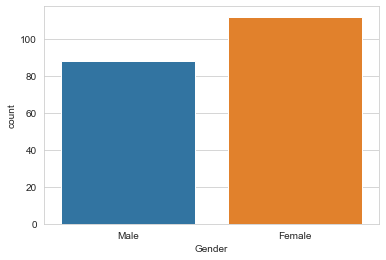

In [6]:
# 성별
sns.countplot(data['Gender'])

1) age

<AxesSubplot:ylabel='Density'>

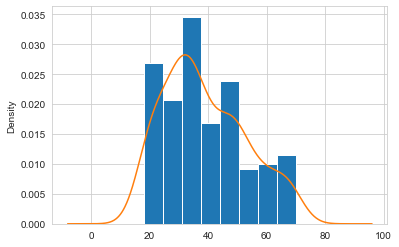

In [7]:
plt.hist(data['Age'], bins='fd', density=True)
data['Age'].plot.density()

2) Annual Income

<AxesSubplot:ylabel='Density'>

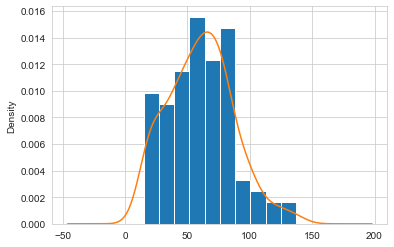

In [8]:
plt.hist(data['Annual Income (k$)'], bins='fd', density=True)
data['Annual Income (k$)'].plot.density()

3) Spending Score

<AxesSubplot:ylabel='Density'>

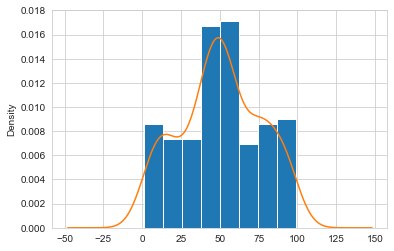

In [9]:
plt.hist(data['Spending Score (1-100)'], bins='fd', density=True)
data['Spending Score (1-100)'].plot.density()

In [12]:
data = data.drop("CustomerID", axis=1)

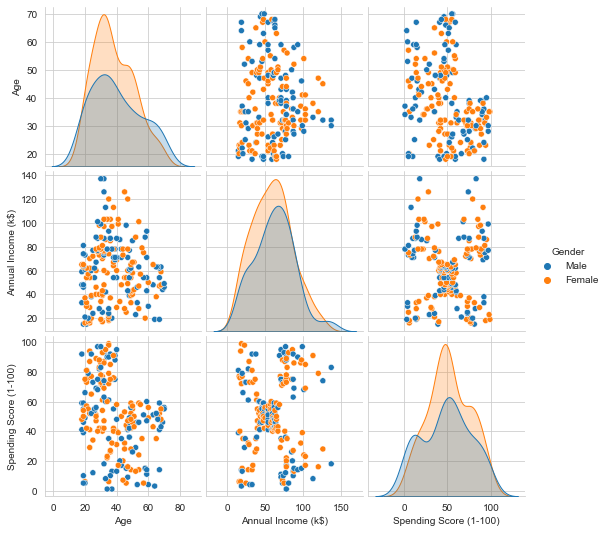

In [13]:
# Feature 간 관계 파악

sns.pairplot(data, hue = "Gender")
plt.show()

In [16]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

sns.pairplot(df, hue = "Gender")의 결과를 보면,
Annual Income (k$)(연 소득)과 Spending Score (1-100)(소비 점수)의 조합은 비교적 뚜렷하게 4개 or 5개의 군집으로 나눌 수 있을 것으로 예상된다

K-MEANS Clustering (K-평균 군집화)

Annual Income (k$), Spending Score (1-100) 기준 Clustering

In [14]:
# data에서 Annual Income (k$), Spending Score (1-100) column만 추출

data_1 = data[['Annual Income (k$)', 'Spending Score (1-100)']]
data_1

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [17]:
# data_1 스케일링

scaler = StandardScaler()
scaler.fit(data_1)
data_1 = pd.DataFrame(scaler.transform(data_1))    
data_1


,0,1
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


In [18]:
# 필요한 라이브러리, 함수 정의
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def elbow(x):
    k = []
    sse = []
    
    for i in range(1, 11):
        model = KMeans(n_clusters = i)
        model.fit(x)
        sse.append(model.inertia_)
        k.append(i)
        
    plt.plot(k, sse, marker='o')
    plt.xlabel("number of cluster")
    plt.ylabel("SSE")
    plt.xticks(range(1, 11))
    plt. show()
    
def get_kmeans_silhouette(df):
    best_n = 1
    best_score = -1

    for n_cluster in range(2, 11):
        kmeans = KMeans(n_clusters = n_cluster)
        kmeans.fit(df)
        cluster = kmeans.predict(df)
        score = silhouette_score(df, cluster)

        print("클러스터의 수 : {}, 실루엣 점수 : {:.3f}".format(n_cluster, score))
        if score > best_score:
            best_n = n_cluster
            best_score = score

    print("\n가장 높은 실루엣 점수를 가진 클러스터 수 : {}, 실루엣 점수 : {:.3f}".format(best_n, best_score))

클러스터의 수 : 2, 실루엣 점수 : 0.295
클러스터의 수 : 3, 실루엣 점수 : 0.467
클러스터의 수 : 4, 실루엣 점수 : 0.494
클러스터의 수 : 5, 실루엣 점수 : 0.555
클러스터의 수 : 6, 실루엣 점수 : 0.540
클러스터의 수 : 7, 실루엣 점수 : 0.526
클러스터의 수 : 8, 실루엣 점수 : 0.454
클러스터의 수 : 9, 실루엣 점수 : 0.454
클러스터의 수 : 10, 실루엣 점수 : 0.448

가장 높은 실루엣 점수를 가진 클러스터 수 : 5, 실루엣 점수 : 0.555


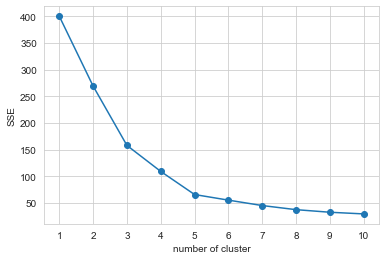

In [19]:
get_kmeans_silhouette(data_1)
elbow(data_1)

k = 5인것이 적절

In [25]:
# K = 5일 때 K-Means Clustering 알고리즘 구현

k_means = KMeans(n_clusters = 5).fit(data_1)



data['k=5'] = k_means.labels_  

data

,Gender,Age,Annual Income (k$),Spending Score (1-100),k=5
0,Male,19,15,39,3
1,Male,21,15,81,4
2,Female,20,16,6,3
3,Female,23,16,77,4
4,Female,31,17,40,3
...,...,...,...,...,...
195,Female,35,120,79,0
196,Female,45,126,28,2
197,Male,32,126,74,0
198,Male,32,137,18,2


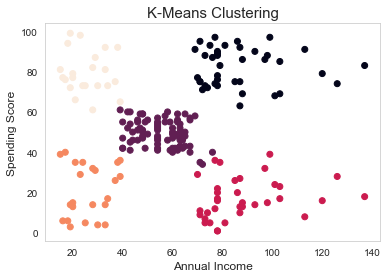

In [28]:
# K = 5일 때 K-Means Clustering의 결과를 시각화

plt.title("K-Means Clustering", fontsize=15)
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c = data['k=5'])
plt.xlabel("Annual Income", fontsize = 12)
plt.ylabel("Spending Score", fontsize = 12)
plt.grid()
plt.show()

DBSCAN clustering

In [29]:
db_data = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
db_data.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [31]:
# 데이터 스케일링

scaler = StandardScaler()
scaler.fit(db_data)
db_data_1 = pd.DataFrame(scaler.transform(db_data), columns = db_data.columns)     
db_data_1

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


In [33]:
# DBSCAN 모델링
from sklearn.cluster import DBSCAN

db_model_1 = DBSCAN(min_samples = 4)     # 3(학습에 사용된 feature 개수) + 1
predict = pd.DataFrame(db_model_1.fit_predict(db_data_1))
predict.columns = ['db_pred']

# 새로운 DataFrame 생성 - 기존 DataFrame과 학습 결과를 concat

db_concat_1 = pd.concat([db_data_1, predict], axis = 1)
db_concat_1

,Age,Annual Income (k$),Spending Score (1-100),db_pred
0,-1.424569,-1.738999,-0.434801,-1
1,-1.281035,-1.738999,1.195704,0
2,-1.352802,-1.700830,-1.715913,-1
3,-1.137502,-1.700830,1.040418,0
4,-0.563369,-1.662660,-0.395980,1
...,...,...,...,...
195,-0.276302,2.268791,1.118061,-1
196,0.441365,2.497807,-0.861839,-1
197,-0.491602,2.497807,0.923953,-1
198,-0.491602,2.917671,-1.250054,-1


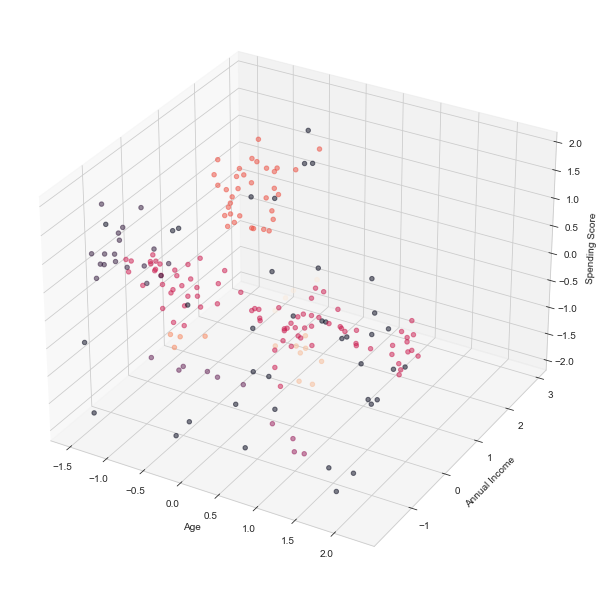

In [35]:
# 3차원 시각화
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (8, 8))
ax = Axes3D(fig)
ax.scatter(db_concat_1['Age'], db_concat_1['Annual Income (k$)'], db_concat_1['Spending Score (1-100)'],
           c = db_concat_1['db_pred'], alpha=0.5)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.show()